In [25]:
import glob
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import xarray as xr


from netCDF4 import Dataset
#Import os, os environ untuk mengatasi error pada basemap, kalau basemapnya ngga error hapus aja
#Sesuaikan letak file epsg di komputer
import os 
os.environ["PROJ_LIB"] = "C:\\Users\\Lenovo\\anaconda3\\pkgs\\proj4-5.2.0-h6538335_1006\\Library\\share"; #fixr
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap

In [26]:
# baca semua lokasi data TRMM

path = glob.glob('GIOVANNI/simpen dulu/*.nc4', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)
print(pathfiles)

['GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150101.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150102.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150103.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150104.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150105.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150106.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150107.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150108.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150109.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150110.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150111.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150112.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150113.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400.tavg1_2d_aer_Nx.20150114.nc4.nc4'
 'GIOVANNI/simpen dulu\\MERRA2_400

In [27]:
# baca semua data TRMM dan ambil variabel hujan

nt = pathfiles.size
SS = np.empty(shape=(nt,24,41,78))
OC = np.empty(shape=(nt,24,41,78))
BC = np.empty(shape=(nt,24,41,78))
SO = np.empty(shape=(nt,24,41,78))
DS = np.empty(shape=(nt,24,41,78))


for i in range(nt):
    data = Dataset(pathfiles[i])
    SS[i,:,:] = data['SSSMASS25'][:]
    OC[i,:,:] = data['OCSMASS'][:]
    BC[i,:,:] = data['BCSMASS'][:]
    SO[i,:,:] = data['SO4SMASS'][:]
    DS[i,:,:] = data['DUSMASS25'][:]

In [28]:
PM=(1.375*SO+1.8*OC+BC+DS+SS)*(10**9)
print(PM)

[[[[ 1.58747885  1.46323477  1.38940299 ...  9.51667569 10.21563942
     8.04085244]
   [ 2.28485228  2.31235384  1.79332628 ...  9.63048758  9.94076413
     6.88752221]
   [ 2.57698553  2.61361827  2.54094751 ...  8.72287679  8.49986873
     5.49110958]
   ...
   [17.11610358 20.29308226 24.04876105 ...  7.80186606  9.01415109
     9.94729549]
   [18.99310738 24.00272836 27.44366514 ...  8.79532844  9.53553207
    10.02457128]
   [22.47202693 28.47162153 31.34148658 ...  9.52127858  9.66284854
     9.60017369]]

  [[ 1.57254003  1.4719087   1.38494821 ...  9.43398781 10.12124464
     7.97440229]
   [ 2.27069505  2.32160898  1.89712447 ...  9.49019174  9.87611593
     6.98166609]
   [ 2.5875218   2.62943457  2.59187102 ...  8.6234774   8.58295657
     5.59992763]
   ...
   [19.13740952 22.85130841 25.67144581 ...  8.02872187  9.36427718
     9.53079713]
   [21.95553571 27.00647034 28.25472908 ...  9.47121883  9.80265505
     9.62216263]
   [26.15720693 31.3204538  30.85833954 ...  9.42

In [29]:
#nt = pathfiles.size
#PM.shape
PM.max()

2506.6454083733092

In [30]:
#Data per jam menjadi data rata-rata 1 hari
PM25 = np.empty(shape=(nt, 41,78))
for i in range(nt):
    for j in range(41):
        for k in range(78):
            PM25[i,j,k] = np.mean(PM[i,:,j,k])

In [31]:
PM25.shape

(731, 41, 78)

In [32]:
PM25.min()

0.24672558240009337

In [33]:
print(PM25)

[[[ 1.73825003  1.66117364  1.90405743 ...  7.85015356  8.44554574
    8.20051885]
  [ 1.90178154  1.97484201  1.895667   ...  7.62702286  8.26360113
    7.69402101]
  [ 2.28056166  2.21521414  2.16140015 ...  7.28926244  7.62883212
    7.03400959]
  ...
  [17.03952308 17.65095247 18.11770511 ...  7.60068709  7.8178447
    7.50188375]
  [18.22200005 18.82790482 19.38055266 ...  7.88045638  8.45860279
    8.63448043]
  [21.21534977 21.80732418 22.57931182 ...  7.87011981  8.55122544
    8.83888817]]

 [[ 6.16200879  6.18758002  6.37442379 ...  4.23633684  5.18112181
    6.13587075]
  [ 5.44958034  5.81194123  5.99990598 ...  3.50453935  4.26633793
    5.16207784]
  [ 4.62689382  5.22089606  5.15284295 ...  3.10420866  3.62291754
    4.41493315]
  ...
  [22.74235932 23.19636227 24.21042989 ...  8.95789616  8.40599231
    8.4486135 ]
  [24.59261094 25.72095613 26.52578971 ... 10.58510309 11.43202539
   12.14579092]
  [27.13522797 28.79731661 29.27977942 ... 12.64627427 13.7952592
   15.22

In [34]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [35]:
# akumulasi data harian menjadi bulanan
pr_das = np.empty(shape=(int(nt/30),41,78))
j = 0

for i in range(int(nt/30)):
    for k in range (41):
        for l in range (78):
            das = np.mean(PM25[j:j+30,k,l])
            pr_das[i,k,l] = das
    j=j+30

In [36]:
pr_das.max()

542.3661432428063

In [37]:
print(pr_das)

[[[ 4.7158439   4.11636323  3.76840742 ... 13.39072027 13.67341519
   14.14512312]
  [ 4.74604734  4.31233613  3.94436712 ... 12.97165373 13.13092365
   13.18598248]
  [ 4.8069123   4.50395542  4.15766226 ... 12.28744866 12.33866409
   12.10849546]
  ...
  [20.19029039 21.83557218 23.43725075 ... 10.04894637 10.36435725
   11.2469917 ]
  [20.42833426 22.22431015 23.96264735 ... 10.92989732 11.30695116
   12.21579281]
  [20.75572151 22.53050453 24.42669592 ... 12.42183394 12.34643551
   12.15622507]]

 [[ 6.55273954  6.5657326   6.61574689 ... 15.53933358 13.62025098
   12.26901816]
  [ 6.23807435  6.25248993  6.20591032 ... 14.28777547 12.83226578
   11.52322934]
  [ 5.82942887  5.80755556  5.95437394 ... 12.8629487  12.14712668
   11.07149166]
  ...
  [22.0100699  22.72917724 23.24726722 ... 17.44416161 17.37693632
   17.40117165]
  [23.29425875 23.91394311 24.3494567  ... 16.77744368 16.98969624
   16.95086869]
  [24.39393717 25.12156482 25.6420084  ... 16.04664561 16.26464192
   16.

In [38]:
# # potong data sesuai domain Jawa Barat

# lat1 = lat[211:225] # -7.125 -3.875
# lon1 = lon[1135:1153] # 103.875 108.125
# lons, lats = np.meshgrid(lon1,lat1)

# pr_jabar = pr[:, 211:225, 1135:1153]
# print(pr_jabar.shape)

<ipython-input-39-66a27694c28b>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


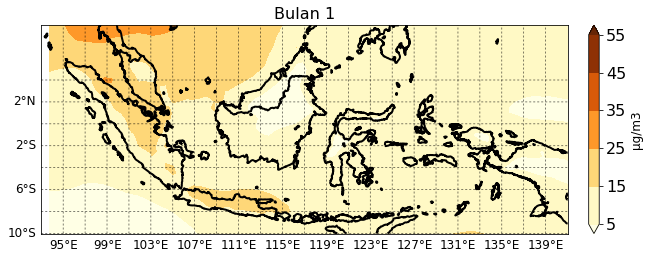

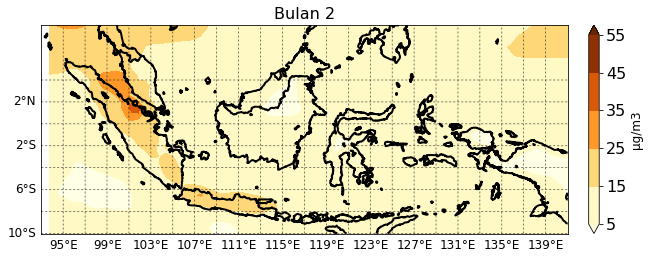

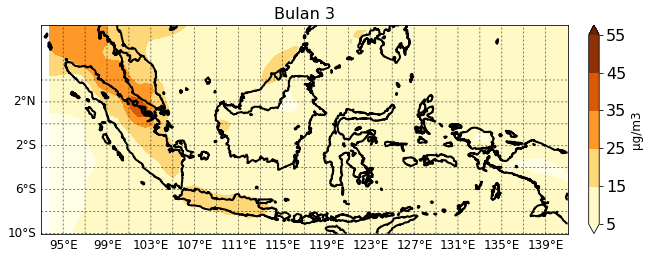

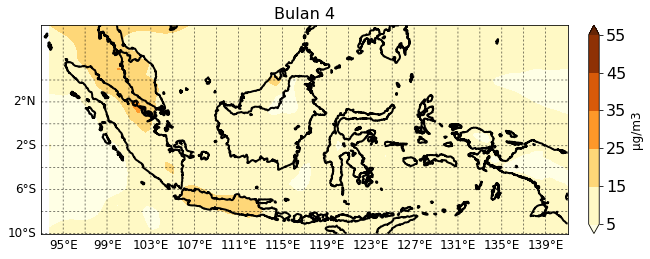

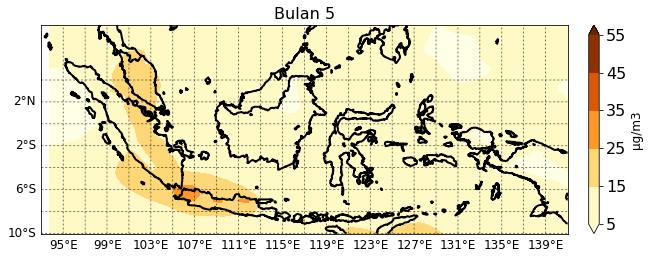

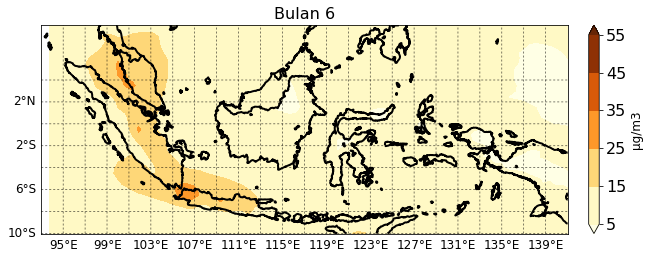

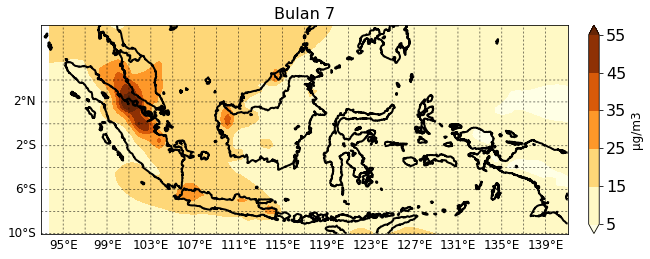

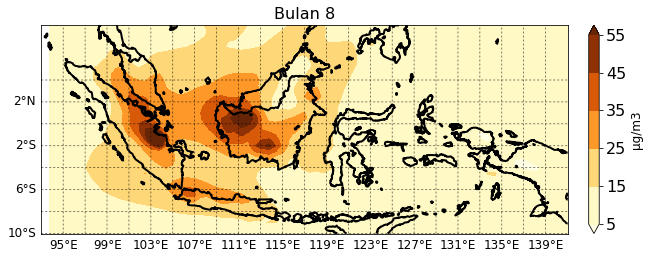

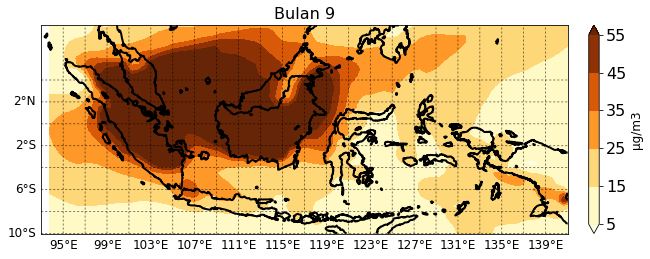

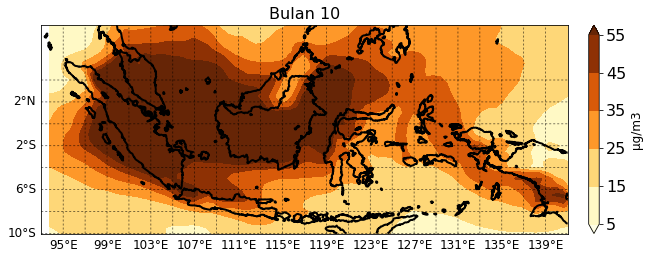

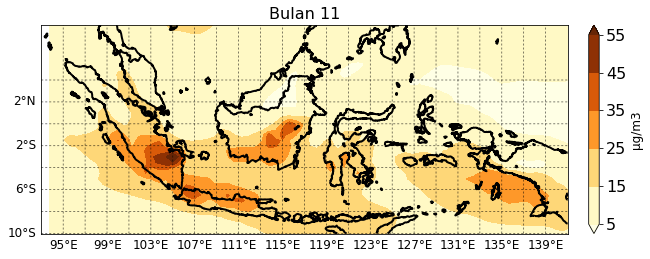

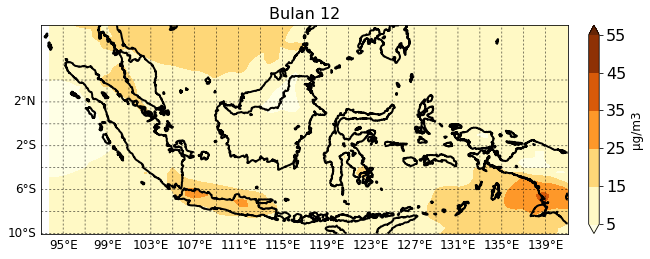

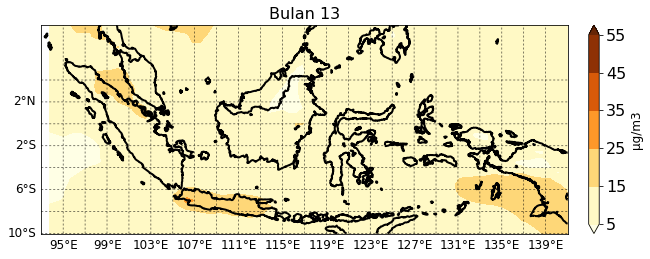

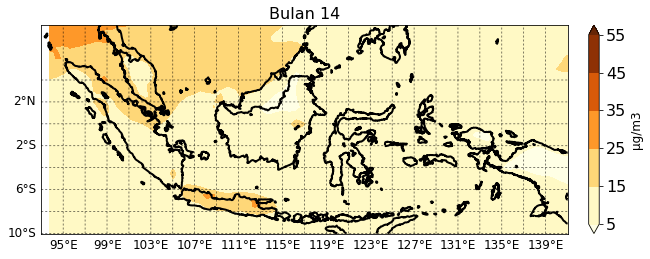

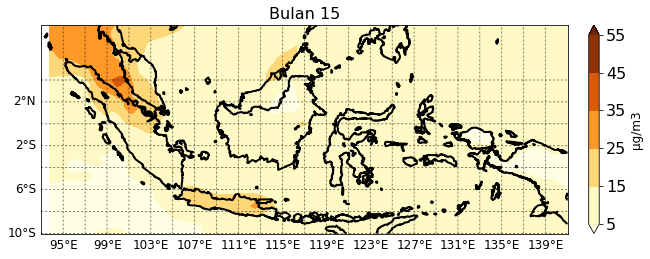

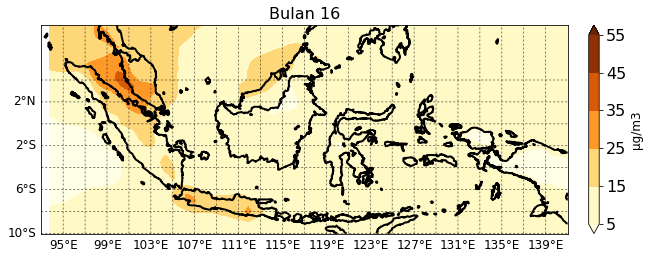

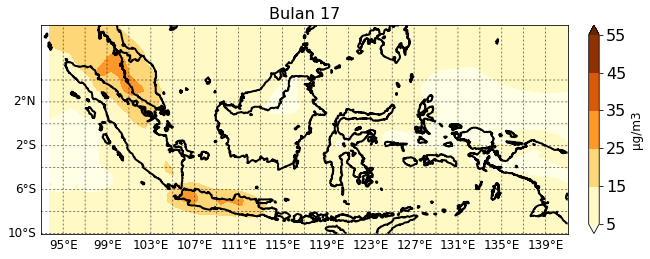

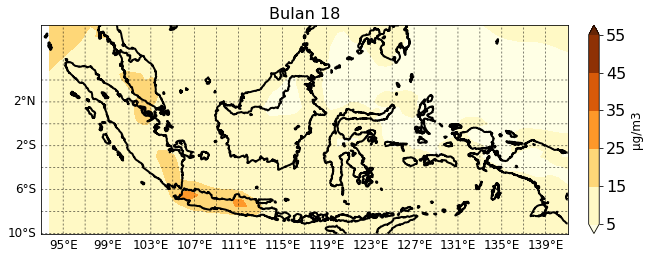

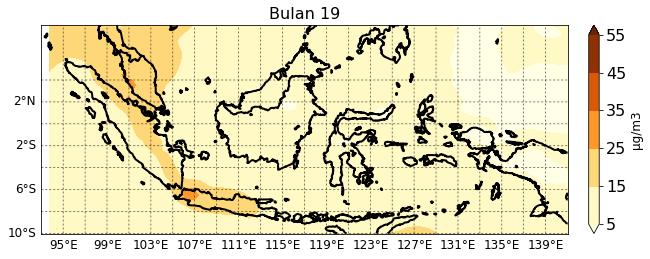

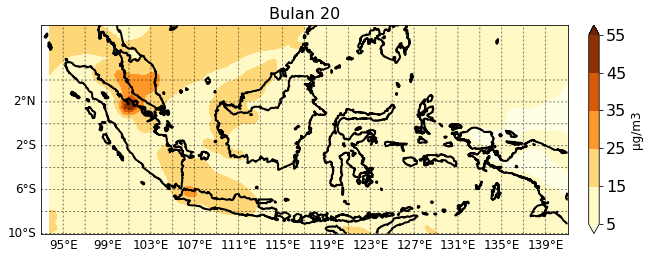

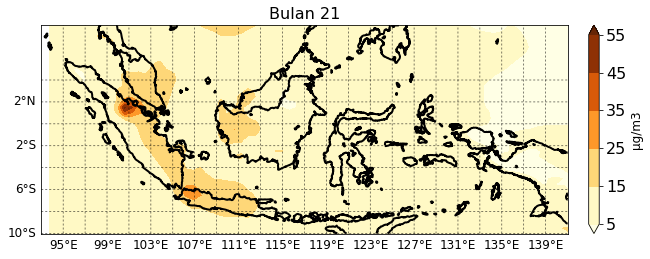

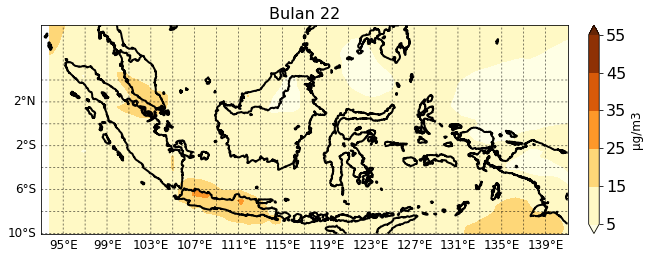

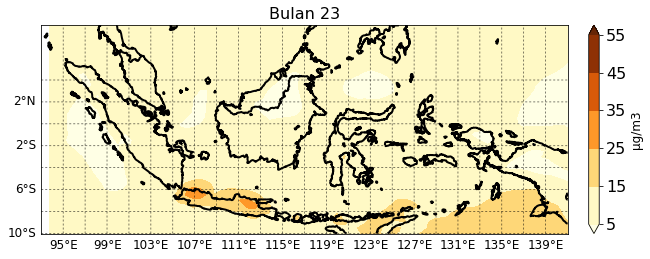

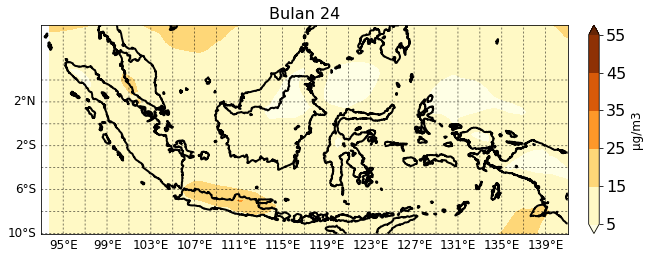

In [39]:
# plot data dasarian
#levels=5
for i in range(24):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, pr_das[i,:,:], levels=[5,15,25,35,45,55], cmap='YlOrBr', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('μg/m3', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("Bulan "+str(i+1), fontsize=16)

    # Save image
    #fig.savefig("bulan "+str(i+1)+".png", bbox='tight', dpi=100)

In [40]:
# baca semua lokasi data TRMM

path = glob.glob('GIOVANNI/data selisih fix/*.nc4', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)
print(pathfiles)

['GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120701.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120702.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120703.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120704.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120705.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120706.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120707.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120708.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120709.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120710.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120711.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120712.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_400.tavg1_2d_aer_Nx.20120713.nc4.nc4'
 'GIOVANNI/data selisih fix\\MERRA2_40

In [131]:
# baca semua data TRMM dan ambil variabel hujan

nt = pathfiles.size
SS = np.empty(shape=(nt,24,41,78))
OC = np.empty(shape=(nt,24,41,78))
BC = np.empty(shape=(nt,24,41,78))
SO = np.empty(shape=(nt,24,41,78))
DS = np.empty(shape=(nt,24,41,78))


for i in range(nt):
    data1 = Dataset(pathfiles[i])
    SS[i,:,:] = data1['SSSMASS25'][:]
    OC[i,:,:] = data1['OCSMASS'][:]
    BC[i,:,:] = data1['BCSMASS'][:]
    SO[i,:,:] = data1['SO4SMASS'][:]
    DS[i,:,:] = data1['DUSMASS25'][:]

In [132]:
PM1=(1.375*SO+1.8*OC+BC+DS+SS)*(10**9)

In [148]:
nt

615

In [133]:
#Data per jam menjadi data rata-rata 1 hari
PM25_1 = np.empty(shape=(nt, 41,78))
for i in range(nt):
    for j in range(41):
        for k in range(78):
            PM25_1[i,j,k] = np.mean(PM1[i,:,j,k])

In [134]:
lat = data1['lat'][:]
lon = data1['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [149]:
# akumulasi data harian menjadi bulanan
pr_das1 = np.empty(shape=(int(nt/30),41,78))
j = 0

for i in range(int(nt/30)):
    for k in range (41):
        for l in range (78):
            das = np.mean(PM25_1[j:j+30,k,l])
            pr_das1[i,k,l] = das
    j=j+30

In [150]:
#hitung rata-rata bulan juli,ags,sept,okt dari data historis tahun 2012-2014
PM_25_1 = np.empty([4, 41,78])
for i in range(4):
    for j in range(41):
        for k in range(78):
            PM_25_1[i,j,k] = np.mean(pr_das1[i:20:4,j,k])

In [151]:
PM_25_1.shape

(4, 41, 78)

In [214]:
#banding=pr_das1[12,:,:]-PM_25_1[0,:,:] #selisih juli 2015 dengan juli data historis
#banding=pr_das1[13,:,:]-PM_25_1[1,:,:] #selisih Agustus 2015 dengan Agustus data historis
#banding=pr_das1[14,:,:]-PM_25_1[2,:,:] #selisih September 2015 dengan September data historis
#banding=pr_das1[15,:,:]-PM_25_1[3,:,:] #selisih Oktober 2015 dengan Oktober data historis
#b
#banding=pr_das1[16,:,:]-PM_25_1[0,:,:] #selisih juli 2016 dengan juli data historis
#banding=pr_das1[17,:,:]-PM_25_1[1,:,:] #selisih Agustus 2016 dengan Agustus data historis
#banding=pr_das1[18,:,:]-PM_25_1[2,:,:] #selisih September 2016 dengan September data historis
banding=pr_das1[19,:,:]-PM_25_1[3,:,:] #selisih Oktober 2016 dengan Oktober data historis

In [215]:
sumatera=banding[2:23,60:74]
sumatera.mean()

-5.70998901728704

In [ ]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [80]:
#SUMATERA, lon=0-22, Lat=2-34
#Kalimantan, Lon=25-41, Lat=14-30
#Jawa, Lon=18-34, Lat=2-10
#Sulawesi, Lon=41-50, Lat=10-26
#Bali dan NT, Lon=34-54, Lat=2-6
#Maluku, Lon=54-60, Lat=14-26
#Papua, Lon=60-74, Lat=2-23
np.where(lats==0.5)

(array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77], dtype=int64))

In [ ]:
# plot data dasarian
#levels=5
for i in range(1):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, banding[:,:], levels=[-12,-9,-6,-3,0,3,6,9,12], cmap='seismic', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('μg/m3', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("Penambahan Oktober 2015 "+str(i+1), fontsize=16)

    # Save image
    #fig.savefig("Penambahan Oktober 2015 "+".png", bbox='tight', dpi=100)

In [ ]:
# ekstrak data timeseries ke excel

workbook = xlsxwriter.Workbook('coba.xlsx') 

for y in range(len(lat)):
    worksheet = workbook.add_worksheet(str(lat[y]))

    row = 0
    column = 0
    worksheet.write(row, column, "Bulanan")

    row = 0
    column = 1
    for item in lon[:]:
        worksheet.write(row, column, item)
        column += 1
    
    row = 1
    column = 0
    for item in (np.arange(0,int(nt/10),1)):
        worksheet.write(row, column, item+1)
        row += 1

    for x in range(len(lon)):
        row = 1
        column = x+1
        for item in pr_das[:,y,x]:
            worksheet.write(row, column, item)
            row += 1

workbook.close()